Universidad de Los Andes

Nicolas David Gil Quijano 

# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

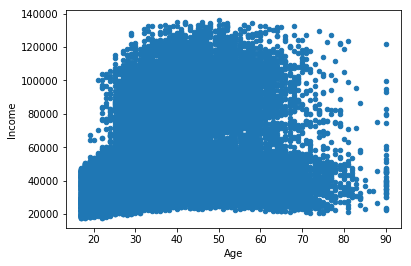

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

- What is the relation between the age and Income?

A simple vista se ve que no hay una relación directa entre la edad y el ingreso. Cuando se analiza las edades y tomando un dato puntual (ingreso=40000) se presenta en todas las edades. 

- For a one percent increase in the Age how much the income increases?

In [4]:
x=income['Age'].values
y=income['Income'].values
n_samples = x.shape[0]
x1 = np.c_[np.ones(n_samples), x]
x1.shape

(32561, 2)

In [5]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression(fit_intercept=False)
linreg2.fit(x1, y)
linreg2.coef_

array([32538.08813087,   542.16765707])

Text(0,0.5,'Income')

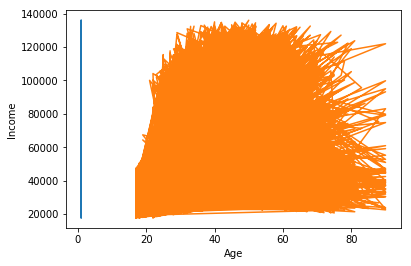

In [6]:
plt.plot(x1, y)
plt.xlabel('Age')
plt.ylabel('Income')

Cuando se realiza la regresion lineal, vemos que al aumentar un porcentaje avanza 542 en el ingreso. 

- sing sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

In [7]:
c = np.array([30 , 40])
c_sample = c.shape[0]
C_ =  np.c_[np.ones(c_sample), c]
linreg2.predict(C_)

array([48803.11784304, 54224.79441376])

Cuando se realiza la prediccion mediante una regresión lineal para la edad de 30 y 40 años, no arroja unos ingreos para 30 años de 48803 y para 40 años de 54224. 

# Exercise 4.2
Evaluate the model using the MSE

In [8]:
from sklearn import metrics

In [9]:
y_pred = linreg2.predict(x1)
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

MSE: 593783043.8402297


La precision de este estimador no es optimo, tomando como referencia 0. Mas pegado al cero quiere decir que le precisión de la predicción es perfecta. 


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [10]:
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [11]:
x_age=income[['Age','Age2']].values
y=income['Income'].values
n_samples = x.shape[0]
x2 = np.c_[np.ones(n_samples), x_age]
x2.shape

(32561, 3)

Ingresamos una nueva columan a nuestra data orginal que nos esta multiplicando la edad por la edad. 

In [12]:
from sklearn.linear_model import LinearRegression
linreg3 = LinearRegression(fit_intercept=False)
linreg3.fit(x2, y)
linreg3.coef_

array([-16225.07097407,   3131.77014151,    -30.54341041])

Cuando se revisa los resultados los coeficienetes hacen referencia a los betas, 0, 1 y 2 para cada una de las variables. 

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [13]:
income.dtypes

Age                 int64
Workclass          object
fnlwgt              int64
Education          object
Education-Num       int64
Martial Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours per week      int64
Country            object
Income            float64
Age2                int64
dtype: object

In [14]:
x_feature=income[['Age','Hours per week','Capital Gain','Capital Loss','Education-Num','fnlwgt']].values
y=income['Income'].values
n_samples = x_feature.shape[0]
x4 = np.c_[np.ones(n_samples), x_feature]
x4.shape

(32561, 7)

In [15]:
from sklearn.linear_model import LinearRegression
linreg4 = LinearRegression(fit_intercept=False)
linreg4.fit(x4, y)
linreg4.coef_

array([-1.98811200e+04,  4.64855677e+02,  4.05376825e+02,  4.74864974e-01,
        6.17243343e+00,  3.65181912e+03,  6.03963340e-03])

In [16]:
y_pred1 = linreg4.predict(x4)
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred1))

MSE: 434054503.618427


En esta regresión se utilizaron la variables que no son categoricas, teniendo en cuenta el resultado del MSE de este ejercicio vs el de edad la predección que mas se ajusta es solo la edad. 

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [17]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)

In [19]:
from sklearn import model_selection # para el 30 y 70 de la base

In [20]:
data["Churn?"] = data["Churn?"].map({"False.": 0, "True.": 1}) #BUSCA LA COLUMNA y reemplazar 

In [21]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Create Y and X

In [22]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?              int64
dtype: object

In [23]:
feature_cols = ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']

In [24]:
X_3 = data[feature_cols]

In [25]:
Y_3 = data["Churn?"]

In [26]:
Y_3.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn?, dtype: int64

- What is the distribution of the churners?

In [43]:
n_sample=Y_3.shape[0]
sum=Y_3.sum()
distribution=sum/n_sample
print(distribution)

0.14491449144914492


Esta es una distribución binaria, analizando el resultado el 14% aproximadamente salen de la compañia. Esto siendo perjudicial ya que en muchos casos sale más costoso la salida de un cliente de la compañia. 

- Split the data in train (70%) and test (30%)

In [28]:
validation_size = 0.30 #datos de validación 30%
X_3_train, X_3_validation, Y_3_train, Y_3_validation = model_selection.train_test_split(X_3, Y_3, test_size=validation_size, random_state=0)

In [29]:
X_3_train.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
2918,58,408,0,174.4,112,29.65,265.8,122,8.21,0.0,0,0.00,4
1884,51,510,12,135.8,60,23.09,200.6,134,8.66,12.3,7,3.32,2
2823,87,415,0,198.3,80,33.71,187.0,89,6.01,16.6,4,4.48,2
2319,83,415,30,272.5,105,46.33,253.0,83,8.14,8.7,6,2.35,3
2980,84,415,0,225.9,86,38.40,275.6,105,9.06,14.3,3,3.86,3


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression(solver='liblinear', C=1e9) #regresión lofgistica tiene metodo de optimización, solver permite ajustar los calculo para el modelo

In [32]:
logreg.fit(X_3_train, Y_3_train) #fit crea el modelo interno

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [33]:
Y_5_predictions = logreg.predict(X_3_validation)

In [34]:
Y_5_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [35]:
from sklearn.metrics import accuracy_score 

In [36]:
from sklearn.metrics import confusion_matrix 

In [37]:
Y_3_predictions = logreg.predict(X_3_validation)

In [38]:
print('Accuracy: \n', accuracy_score(Y_3_validation, Y_3_predictions)) #86% de los datos de validación fueron correctos, margen deerror del 14%

Accuracy: 
 0.859


Cuando vemos el resultado el 86% de los datos de validación fueron correctos con un margen de error del 14%.

In [39]:
print('Confusion Matrix: \n', confusion_matrix(Y_3_validation, Y_3_predictions))

Confusion Matrix: 
 [[848  14]
 [127  11]]


Cuando se analiza la matriz de confusión podemos concluir que hubo una precision bastante alta ya que de 862 datos verdaderos el predijo o clasifico 848 correctamente y solo 14 los etiqueto mal. 

De los 138 datos que debian ser falsos, 127 los clasifico bien y 11 mal de l total de la base. 